testing/weight-space/rq/aniso=[1.0000,1.0000,1.0000]-s=1.000-l=1.000-a=0.500/spectral_density.bin


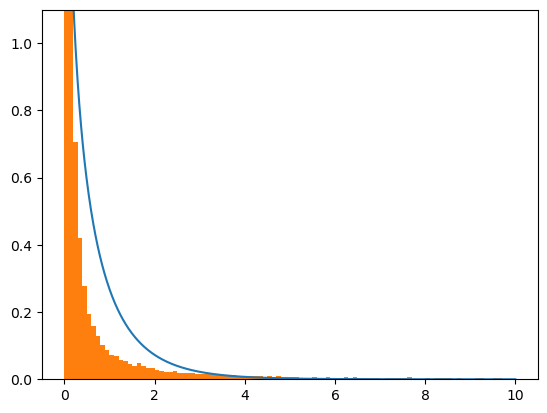

testing/weight-space/rq/aniso=[1.0000,1.0000,1.0000]-s=1.000-l=1.000-a=1.000/spectral_density.bin


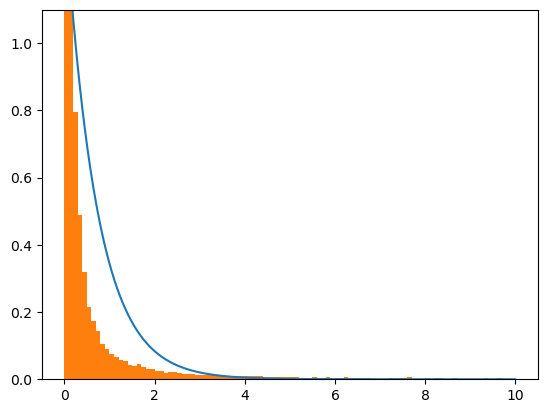

testing/weight-space/rq/aniso=[1.0000,1.0000,1.0000]-s=1.000-l=1.000-a=5.000/spectral_density.bin


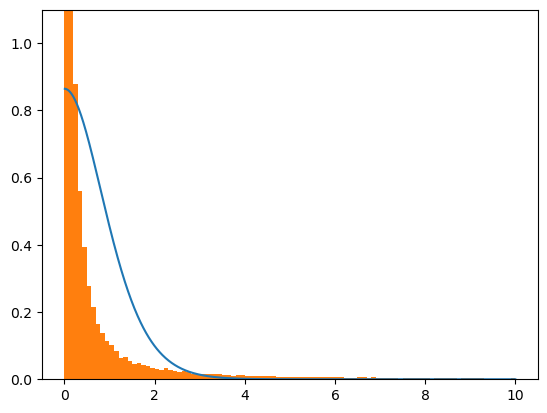

testing/weight-space/se/aniso=[1.0000,1.0000,1.0000]-s=1.000-l=1.000/spectral_density.bin


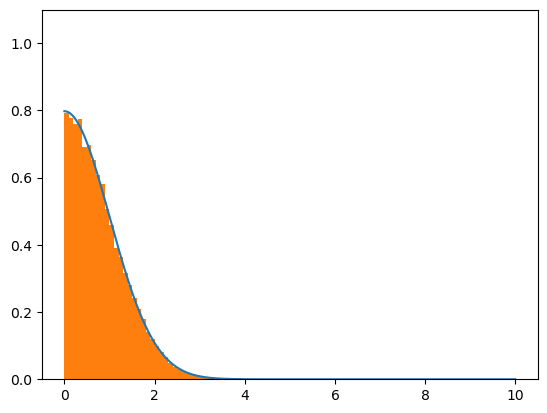

In [31]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special


def gt_spec_se(xs, l=1, sigma=1):
    norm = 1.0 / (np.sqrt(np.pi/2) * sigma**2)
    return norm*(np.exp(-0.5 * l**2 * xs**2) * sigma**2)/np.sqrt(1/l**2)


def gt_spec_rq(xs, l=1, sigma=1, a=1):
    xs = np.maximum(xs, 0.00001)
    norm = 1.0 / (np.sqrt(np.pi/2) * sigma**2)
    return norm*(np.power(2., 5. / 4. - a / 2) * np.power(1 / (a * l * l), -(1. / 4.) - a /
                2) * sigma * sigma * np.power(abs(xs), -0.5 + a) *
                scipy.special.kv(0.5 - a, (np.sqrt(2) * np.abs(xs)) / np.sqrt(1. / (a * l * l)))) / scipy.special.gamma(a)

for file in glob.glob("testing/weight-space/*/*/spectral_density.bin"):
    file = file.replace("\\", "/")
    print(file)
    spectrum = np.reshape(np.fromfile(file, dtype=np.float64), (-1))
    samples = np.reshape(np.fromfile(file.replace("spectral_density.bin", "spectral_density_samples.bin"), dtype=np.float64), (-1))
    #spectrum = np.fft.fftshift(spectrum)
    
    xs = np.linspace(0, 10, len(spectrum))
    plt.ylim(0, 1.1)
    plt.plot(xs, spectrum)
    plt.hist(samples, range=(0,10), density=True, bins=100)

    plt.show()

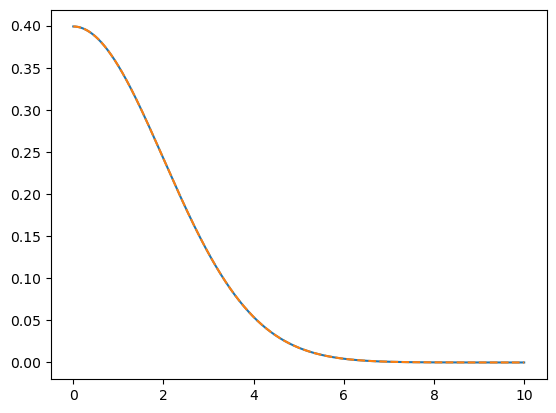

In [2]:
def normal_pdf(xs, mean, stddev):
    return 1/(stddev*np.sqrt(2*np.pi)) * np.exp(-0.5*((xs-mean)/stddev)**2)

l = 0.5
sigma = 1

plt.plot(xs, gt_spec_se(xs, l=l, sigma=sigma))
plt.plot(xs, normal_pdf(xs, 0, 1/l)*2, "--")

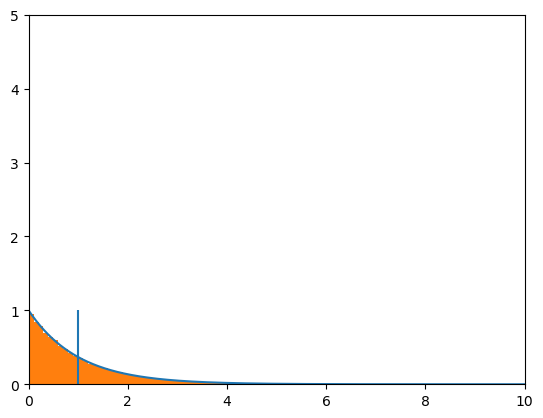

In [3]:
l = 1
sigma = 1
a = 1
xs = np.linspace(0, 10, 1000)

def gamma(xs, a, b):
    return xs**(a-1) * np.exp(- (a*xs)/b) / ((a/b)**(-a) *scipy.special.gamma(a) )

def gamma_sample_mean(shape,mean,n=None):
    scale = mean/shape
    return np.random.gamma(shape, scale, n)

plt.plot(xs, gamma(xs,a,1/l**2))
samples = gamma_sample_mean(a,1/l**2,100000)
plt.hist(samples, density=True, range=(0,20), bins=200)
plt.vlines(np.mean(samples), 0, 1)
plt.xlim(0,10)
plt.ylim(0, 5)
plt.show()



(0.0, 1.1)

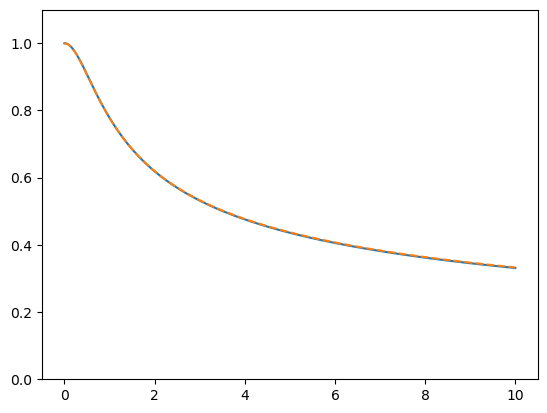

In [28]:
l = 1
sigma = 1
a = 0.2
xs = np.linspace(0, 10, 1000)

def gt_rq(xs, l, sigma, a):
    return sigma**2 * (1 + xs**2/(2*a*l**2))**(-a)

def gt_se(xs, ls, sigma):
    return sigma**2 * np.exp(- xs**2/(2*ls**2))

plt.plot(xs, gt_rq(xs, l, sigma, a))

samples = np.zeros_like(xs)
n_samples = 100000
for i in range(n_samples):
    tau = gamma_sample_mean(a, 1/l**2)
    ls = 1 / tau ** 0.5
    samples += gt_se(xs, ls, sigma)
samples /= n_samples

plt.plot(xs, samples, "--")

plt.ylim(0, 1.1)

(0.0, 1.1)

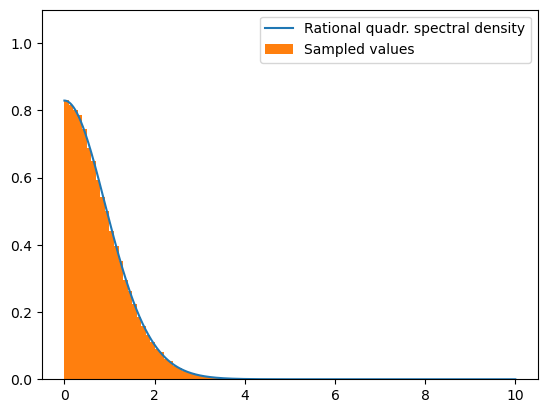

In [29]:
l = 1
sigma = 0.5
a = 10
xs = np.linspace(0, 10, 100000)

plt.plot(xs, gt_spec_rq(xs, l=l, sigma=sigma,a=a), label="Rational quadr. spectral density")

samples = []
for i in range(100000):
    tau = gamma_sample_mean(a, 1/l**2)
    ls = 1 / tau ** 0.5
    samples.append(np.abs(np.random.normal(0,1/ls)))

plt.hist(samples, density=True, range=(0,10), bins=100, label="Sampled values")
plt.legend()
plt.ylim(0, 1.1)